# 개요
- 교과목: 빅데이터 분석 및 시각화
- 능력단위: 빅데이터 분석 결과 시각화
- 훈련교사명: 정지훈 강사
- 수강생명: 김태용
- 평가방법: 기타(작업형)
- 평가예정일: 2021년 12월 22일 수요일 (1시간)

# 문제
- 시각화는 기본함수로도 간단하게 그릴 수 있지만, 세세한 옵션 수정을 통해 보다 정확하게 전달할 수 있다. 
- 다음 빈칸의 코드를 작성하여 두개의 그래프를 비교 작성할 수 있다. 

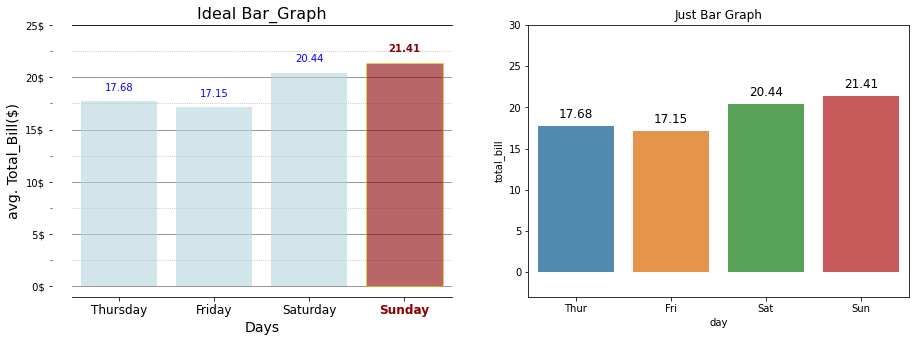

In [6]:
# (1) 라이브러리 불러오기 
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator, FuncFormatter)
import seaborn as sns
import numpy as np

# (2) 데이터 불러오기
tip = sns.load_dataset("tips")

# (3) major_formatter 함수 정의하기
def major_formatter(x, pos):
    return "%2d$" % x
formatter = FuncFormatter(major_formatter)

# (4) matplotlib 시각화 위한 객체 선언하기
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(15, 5))

# (5) 왼쪽에 막대 그래프 작성하기
ax0 = sns.barplot(x = "day", y = "total_bill", data = tip, 
                  ci=None, color="lightblue", alpha=0.6, zorder=2, 
                  ax=ax[0])

# (6) 막대그래프 위에 텍스트 추가하기
total_mean = tip.groupby(["day"])["total_bill"].agg("mean")
day_memory = total_mean.sort_values(ascending=False).index[0]
mean_memory = np.round(total_mean.sort_values(ascending=False)[0], 2)
for p in ax0.patches:
  fontweight = "normal"
  color = "b"
  height = np.round(p.get_height(), 2)
  if mean_memory == height:
    fontweight="bold"
    color="darkred"
    p.set_facecolor(color)
    p.set_edgecolor("gold")
  ax0.text(p.get_x() + p.get_width()/2., height+1, height, ha = "center", size=10, fontweight=fontweight, color=color)

# (7) 옵션 추가하기 - y축과 타이틀
ax0.set_ylim(-1, 25)
ax0.set_title("Ideal Bar_Graph", size = 16)

# (8) 옵션 추가하기 - spine 설정 추가하기
ax0.spines["left"].set_position(("outward", 20))
ax0.spines["left"].set_visible(False)
ax0.spines["right"].set_visible(False)

# (9) 옵션 추가하기 - y축 설정 및 grid 추가하기
ax0.yaxis.set_major_locator(MultipleLocator(5))
ax0.yaxis.set_major_formatter(formatter)
ax0.yaxis.set_minor_locator(MultipleLocator(2.5))
ax0.set_ylabel("avg. Total_Bill($)", fontsize=14)
ax0.grid(axis="y", which="major", color="gray")
ax0.grid(axis="y", which="minor", ls=":")

# (10) 옵션 추가하기 - x축 설정 추가하기
ax0.set_xlabel("Days", fontsize=14)
for xtick in ax0.get_xticklabels():
  if xtick.get_text() == day_memory:
    xtick.set_color("darkred")
    xtick.set_fontweight("bold")
ax0.set_xticklabels(["Thursday", "Friday", "Saturday", "Sunday"], size=12)

# 그대로 적용하세요. 
ax1 = sns.barplot(x = "day", y = 'total_bill', data = tip, 
                  ci=None, alpha=0.85, 
                  ax=ax[1])
for p in ax1.patches:
  height = np.round(p.get_height(), 2)
  ax1.text(p.get_x() + p.get_width()/2., height+1, height, ha = 'center', size=12)
ax1.set_ylim(-3, 30)
ax1.set_title("Just Bar Graph")

fig.show()

In [2]:
tip.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
